# Speckle

La siguiete celda es aprovechada para cargar algunas librerías útiles durante el desarrollo de la practica:

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, img_as_uint, img_as_float
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray
import scipy.misc

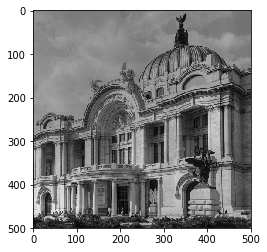

/home/simon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/simon/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


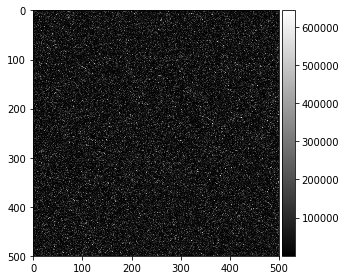

In [2]:
size=(500,500)
# imread lee las imagenes con los pixeles codificados como enteros 
# en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
imagellave=io.imread("imagenllave.jpg")/255.0
image=io.imread("imagen.jpg")/255.0
#print(imagellave)
#plt.imshow(imagellave,vmin=0,vmax=1)
#plt.show()
#plt.imshow(image,vmin=0,vmax=1)
#plt.show()
h=np.cos(2*np.pi*imagellave)+(np.sin(2*np.pi*imagellave)*(0+1j))
img_gray = rgb2gray(image)
plt.imshow(image,vmin=0,vmax=1)
plt.show()
x=np.fft.fft2(np.multiply(h,img_gray))
m=(np.absolute(x))**2
scipy.misc.imsave('outfile.jpg',m)

im = np.array(m, dtype='uint8')
#im = exposure.rescale_intensity(m, out_range='float')
#im = img_as_uint(im)
io.imshow(m,cmap='gray')
io.imsave("intensidad2.jpg",im)
io.show()

#io.imsave("imagen_encrip.jpg",m)

AttributeError: 'numpy.ndarray' object has no attribute 'autoscale_None'

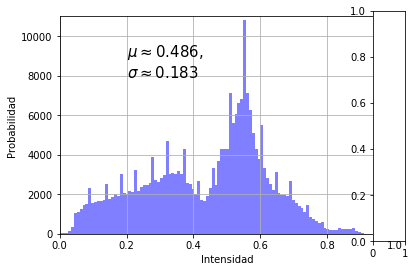

In [10]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
num_bins ='auto'
image_v=np.reshape(img_gray,-1)
image1_v=np.reshape(m,-1)
mu=np.median(image_v)
s=np.std(image_v)
f=[]
x=np.arange(0,1,0.01)
for i in range(0,len(x)):
    f.append((5000*np.exp(-(x[i]-mu)**2/(2*s**2)))/(np.sqrt(2*np.pi)*s))
    
n, bins, patches = plt.hist(image_v, num_bins, facecolor='Blue', alpha=0.5)
#plt.hold(True)
#plt.plot(x,f,'-',linewidth=2,color='g')
plt.axis([0,1,0,11000])
plt.xlabel("Intensidad")
plt.ylabel("Probabilidad")
plt.text(0.2, 8000, r'$\mu\approx 0.486,$' "\n" r'$\sigma\approx 0.183$',size=15)
plt.grid()
plt.savefig("Histograma imagen.jpg")
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(img_gray,cax=cax)
plt.show()

n, bins, patches = plt.hist(image1_v, num_bins, facecolor='green', alpha=0.5)
plt.axis([0,600000,0,9000])
plt.xlabel("Intensidad")
plt.ylabel("Probabilidad")
plt.text(0.2, 8000, r'$\mu\approx 0.486,$' "\n" r'$\sigma\approx 0.183$',size=20)
plt.grid()
plt.savefig("Histograma encrip.jpg")
plt.show()
print(np.median(image_v),np.std(image_v))
print(np.median(image1_v),np.std(image1_v))


# Límite

55119.70716193276 3805.780726025905


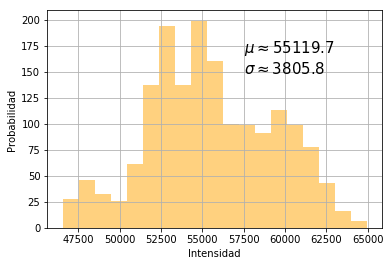

In [6]:
n=150

Lx=[]
for i in range(0,int(len(image1_v)/n)):
    po=0
    for j in range(i,i+n):
        po+=image1_v[j]
    Lx.append(po/n)
    i+=n
mu=np.median(Lx)
s=np.std(Lx)
print(mu,s)
#x=np.arange(20000,120000,1)
#f=[]
#for i in range(0,len(x)):
#    f.append((20000000*np.exp(-(x[i]-mu)**2/(2*s**2)))/(np.sqrt(2*np.pi)*s))
    
n, bins, patches = plt.hist(Lx, num_bins, facecolor='orange', alpha=0.5)
#plt.axis([0,67000,0,180])
plt.xlabel("Intensidad")
plt.ylabel("Probabilidad")
plt.text(57500, 150, r'$\mu\approx 55119.7$' "\n" r'$\sigma\approx 3805.8$',size=15)
plt.grid()
plt.savefig("cosita5.jpg")
plt.show()

##### 